In [2]:
# Prepare the environment
import gget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import scanpy.external as sce

gget.setup("cellxgene")

# Uncomment the following line to see the documentation
# help(gget.cellxgene)

12:48:18 - INFO - Installing cellxgene-census package (requires pip).
12:48:19 - INFO - cellxgene_census installed succesfully.


In [3]:
'''
Query the cellxgene database for the genes of interest
Filters:
Genes: C1QA, C1QC, C1QB, FCN3, CFH, CD55, CR1, CD46, C1D, CFI, C7, C2, CFP, VCP, C5, FCN2, FCN1, CD59, C1S, C1R, C3AR1, C1QBP, CFD, C3, C5AR1, C5AR2, C6, C9, CR2, C4B, CFB, C4A
disease: normal
tissue_general: kidney

> Query Time: 3m 30s
'''

kidney = gget.cellxgene(
    ensembl=True,
    verbose=True,
    gene=["ENSG00000173372", "ENSG00000159189", "ENSG00000173369", "ENSG00000000971", "ENSG00000196352", "ENSG00000203710", "ENSG00000117335", "ENSG00000197223", "ENSG00000205403", "ENSG00000112936", "ENSG00000166278", "ENSG00000126759", "ENSG00000106804", "ENSG00000085063", "ENSG00000182326", "ENSG00000159403", "ENSG00000171860", "ENSG00000108561", "ENSG00000197766", "ENSG00000125730", "ENSG00000197405", "ENSG00000134830", "ENSG00000039537", "ENSG00000113600", "ENSG00000117322", "ENSG00000224389", "ENSG00000243649", "ENSG00000244731"],
    disease='normal',
    tissue_general='kidney'
)
kidney.write_h5ad(
    filename="/Volumes/CHAMPANERI/Databases/Human_Census_KidneyData.h5ad",
)

12:48:19 - INFO - Fetching AnnData object from CZ CELLxGENE Discover. This might take a few minutes...
The "stable" release is currently 2025-01-30. Specify 'census_version="2025-01-30"' in future calls to open_soma() to ensure data consistency.
/Users/aumchampaneri/.pyenv/versions/miniconda3-latest/lib/python3.12/site-packages/gget/gget_cellxgene.py:189: FutureWarning: The argument `column_names` is deprecated and will be removed in a future release. Please use `obs_column_names` and `var_column_names` instead.
  adata = cellxgene_census.get_anndata(


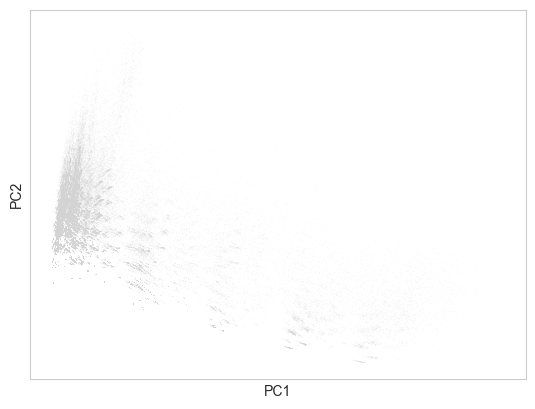

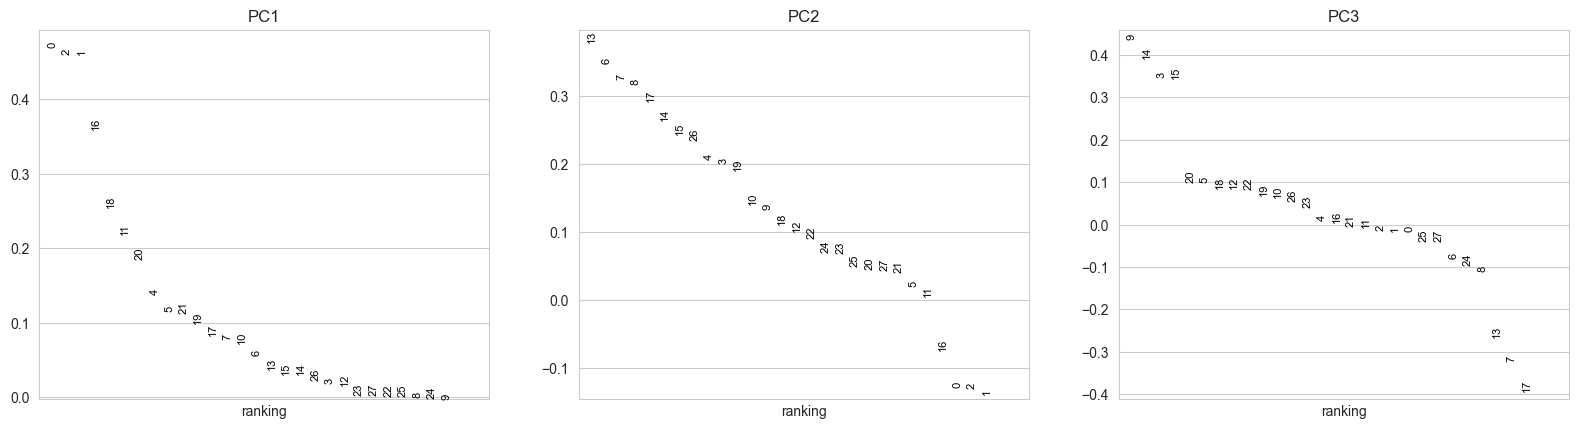

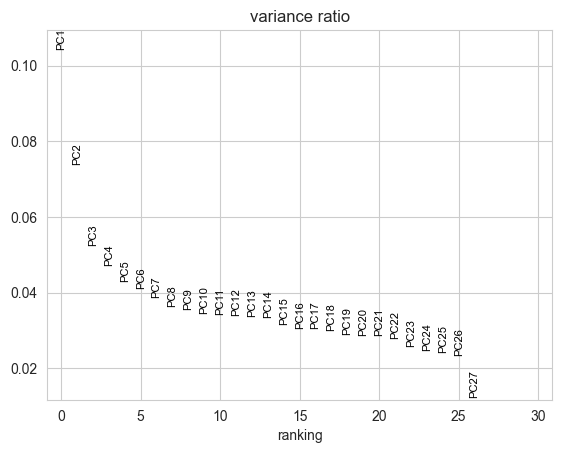

In [4]:
# import scanpy.external as sce
kidney = sc.read_h5ad("/Volumes/CHAMPANERI/Databases/Human_Census_KidneyData.h5ad")

sc.pp.filter_genes(kidney, min_counts=1)
sc.pp.normalize_total(kidney, target_sum=1e6)
sc.pp.log1p(kidney)
sc.pp.scale(kidney)

sc.tl.pca(kidney)
sc.pl.pca_overview(kidney)
#
# sce.pp.harmony_integrate(kidney, 'dataset_id')
# 'X_pca_harmony' in kidney.obsm

In [121]:
all_genes = {
    'C1D': 'ENSG00000197223',
    'C1QA': 'ENSG00000173372',
    'C1QB': 'ENSG00000173369',
    'C1QBP': 'ENSG00000108561',
    'C1QC': 'ENSG00000159189',
    'C1R': 'ENSG00000159403',
    'C1S': 'ENSG00000182326',
    'C2': 'ENSG00000166278',
    'C3': 'ENSG00000125730',
    'C3AR1': 'ENSG00000171860',
    'C4A': 'ENSG00000244731',
    'C4B': 'ENSG00000224389',
    'C5': 'ENSG00000106804',
    'C5AR1': 'ENSG00000197405',
    'C5AR2': 'ENSG00000134830',
    'C6': 'ENSG00000039537',
    'C7': 'ENSG00000112936',
    'C9': 'ENSG00000113600',
    'CD46': 'ENSG00000117335',
    'CD55': 'ENSG00000196352',
    'CD59': 'ENSG00000085063',
    'CFB': 'ENSG00000243649',
    'CFD': 'ENSG00000197766',
    'CFH': 'ENSG00000000971',
    'CFI': 'ENSG00000205403',
    'CFP': 'ENSG00000126759',
    'CR1': 'ENSG00000203710',
    'CR2': 'ENSG00000117322',
    'FCN1': 'ENSG00000085265',
    'FCN2': 'ENSG00000160339',
    'FCN3': 'ENSG00000142748',
    'VCP': 'ENSG00000165280'
}

subset_genes = {
    "C3": "ENSG00000125730",
    "C3AR1": "ENSG00000171860",
    "C5": "ENSG00000106804",
    "C5AR1": "ENSG00000197405",
    "C5AR2": "ENSG00000134830",
    "CFH": "ENSG00000000971",
}

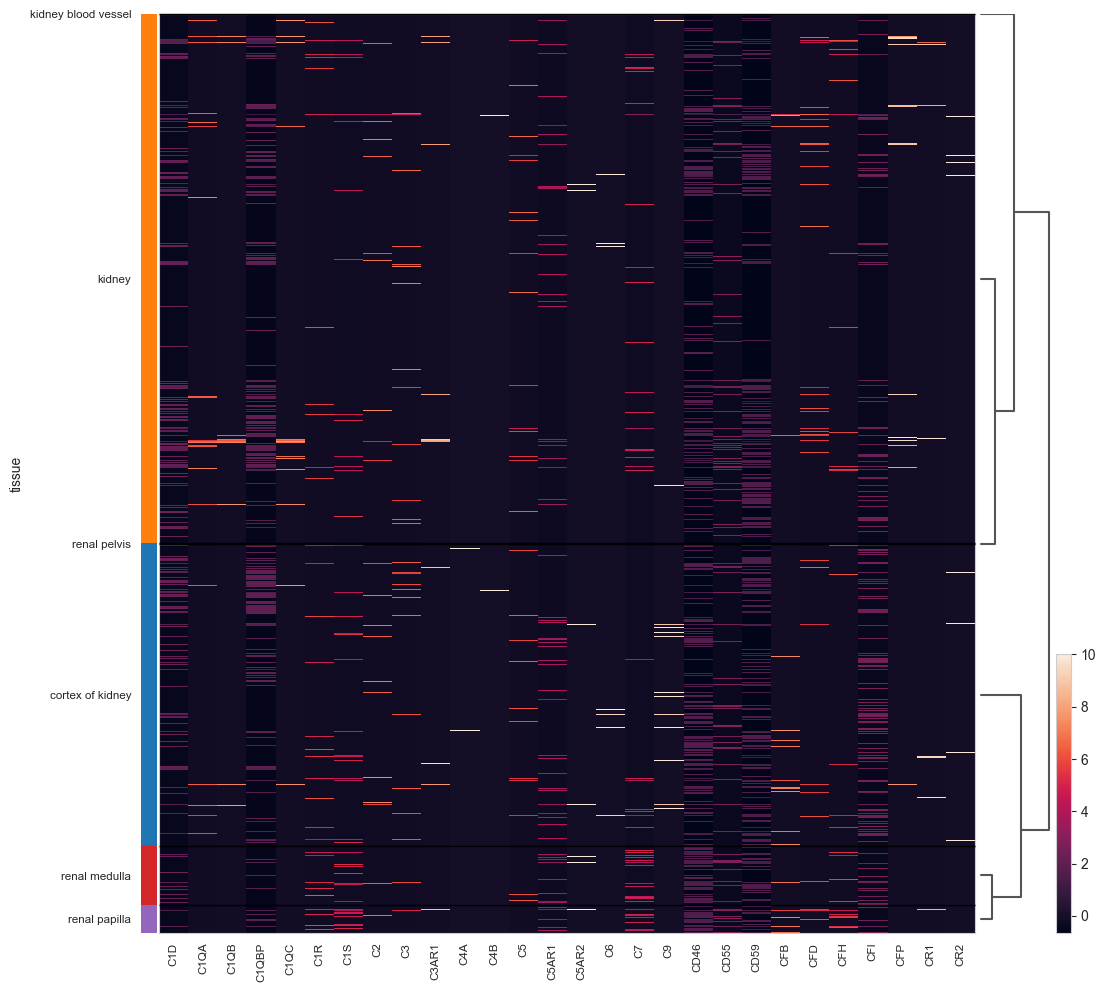

In [83]:
# Create a dictionary to map Ensembl codes to gene names
ensembl_to_gene = {v: k for k, v in all_genes.items()}

# Check if any of the gene names in the all_genes dictionary are present in kidney.var_names
genes_in_data = [gene for gene in all_genes.keys() if gene in kidney.var_names]

# Print the expression data for those genes
if genes_in_data:
    # print("Genes found in the dataset:", genes_in_data)
    expression_data = kidney[:, genes_in_data].X # Get the expression data for the found genes
    # print("Expression data for the found genes:\n", expression_data)
else:
    print("No genes from the dictionary were found in the dataset.")

# Plot heatmap with the found genes using gene names
if genes_in_data:
    sc.pl.heatmap(
        kidney,
        var_names=genes_in_data,
        groupby='tissue',
        dendrogram=True,
        standard_scale=None,
        log=False,
        figsize=(12, 12),  # Increase the figure height
        use_raw=False,
        vmax=10,
        # vmin=0.9,
        # yticklabels_fontsize=10  # Adjust the font size of the Y-axis labels
    )

In [ ]:
adata = kidney

# Create a dictionary to map Ensembl codes to gene names
ensembl_to_gene_all = {v: k for k, v in all_genes.items()}

# Check if any of the gene names in the all_genes dictionary are present in kidney.var_names
genes_in_data_all = [gene for gene in all_genes.keys() if gene in adata.var_names]

# Print the expression data for those genes
if genes_in_data_all:
    # print("Genes found in the dataset:", genes_in_data)
    expression_data = adata[:, genes_in_data_all].X # Get the expression data for the found genes
    # print("Expression data for the found genes:\n", expression_data)
else:
    print("No genes from the dictionary were found in the dataset (all).")

#####

# Create a dictionary to map Ensembl codes to gene names
ensembl_to_gene_subset = {v: k for k, v in subset_genes.items()}

# Check if any of the gene names in the all_genes dictionary are present in kidney.var_names
genes_in_data_subset = [gene for gene in subset_genes.keys() if gene in adata.var_names]

# Print the expression data for those genes
if genes_in_data_subset:
    # print("Genes found in the dataset:", genes_in_data)
    expression_data = adata[:, genes_in_data_subset].X # Get the expression data for the found genes
    # print("Expression data for the found genes:\n", expression_data)
else:
    print("No genes from the dictionary were found in the dataset (subset).")

"""
Plot a heatmap of gene expression data for the found genes.

This function generates a heatmap of the expression data for the genes found in the dataset.
The heatmap is grouped by tissue and includes a dendrogram for hierarchical clustering.

Parameters:
    adata (AnnData): The annotated data matrix.
    genes_in_data (list): List of gene names found in the dataset.

Returns:
    None: The function saves the heatmap as a PDF file.
"""
# sc.pl.heatmap(
#     adata,
#     var_names=genes_in_data_all,
#     groupby='tissue',
#     dendrogram=True,
#     standard_scale=None,
#     log=False,
#     figsize=(12, 12),  # Increase the figure height
#     use_raw=False,
#     vmax=10,
#     # vmin=0.9,
#     # yticklabels_fontsize=10  # Adjust the font size of the Y-axis labels
#     save='human-census_all-genes_tissue_hm.pdf'
# )
sc.pl.heatmap(
    adata,
    var_names=genes_in_data_all,
    groupby='cell_type',
    dendrogram=True,
    standard_scale=None,
    log=False,
    figsize=(30, 12),  # Increase the figure height
    use_raw=False,
    vmax=10,
    swap_axes=True,
    # vmin=0.9,
    # yticklabels_fontsize=10  # Adjust the font size of the Y-axis labels
    save='human-census_all-genes_cell-type_hm.pdf'
)




# sc.pl.heatmap(
#     adata,
#     var_names=genes_in_data_subset,
#     groupby='tissue',
#     dendrogram=True,
#     standard_scale=None,
#     log=False,
#     figsize=(4, 12),  # Increase the figure height
#     use_raw=False,
#     vmax=10,
#     # vmin=0.9,
#     # yticklabels_fontsize=10  # Adjust the font size of the Y-axis labels
#     save='human-census_all-genes_tissue_hm.pdf'
# )
# sc.pl.heatmap(
#     adata,
#     var_names=genes_in_data_subset,
#     groupby='cell_type',
#     dendrogram=True,
#     standard_scale=None,
#     log=False,
#     figsize=(4, 20),  # Increase the figure height
#     use_raw=False,
#     vmax=10,
#     # vmin=0.9,
#     # yticklabels_fontsize=10  # Adjust the font size of the Y-axis labels
#     save='human-census_all-genes_tissue_hm.pdf'
# )

Available columns: ['dataset_id', 'assay', 'suspension_type', 'sex', 'tissue_general', 'tissue', 'cell_type', 'is_primary_data', 'disease']


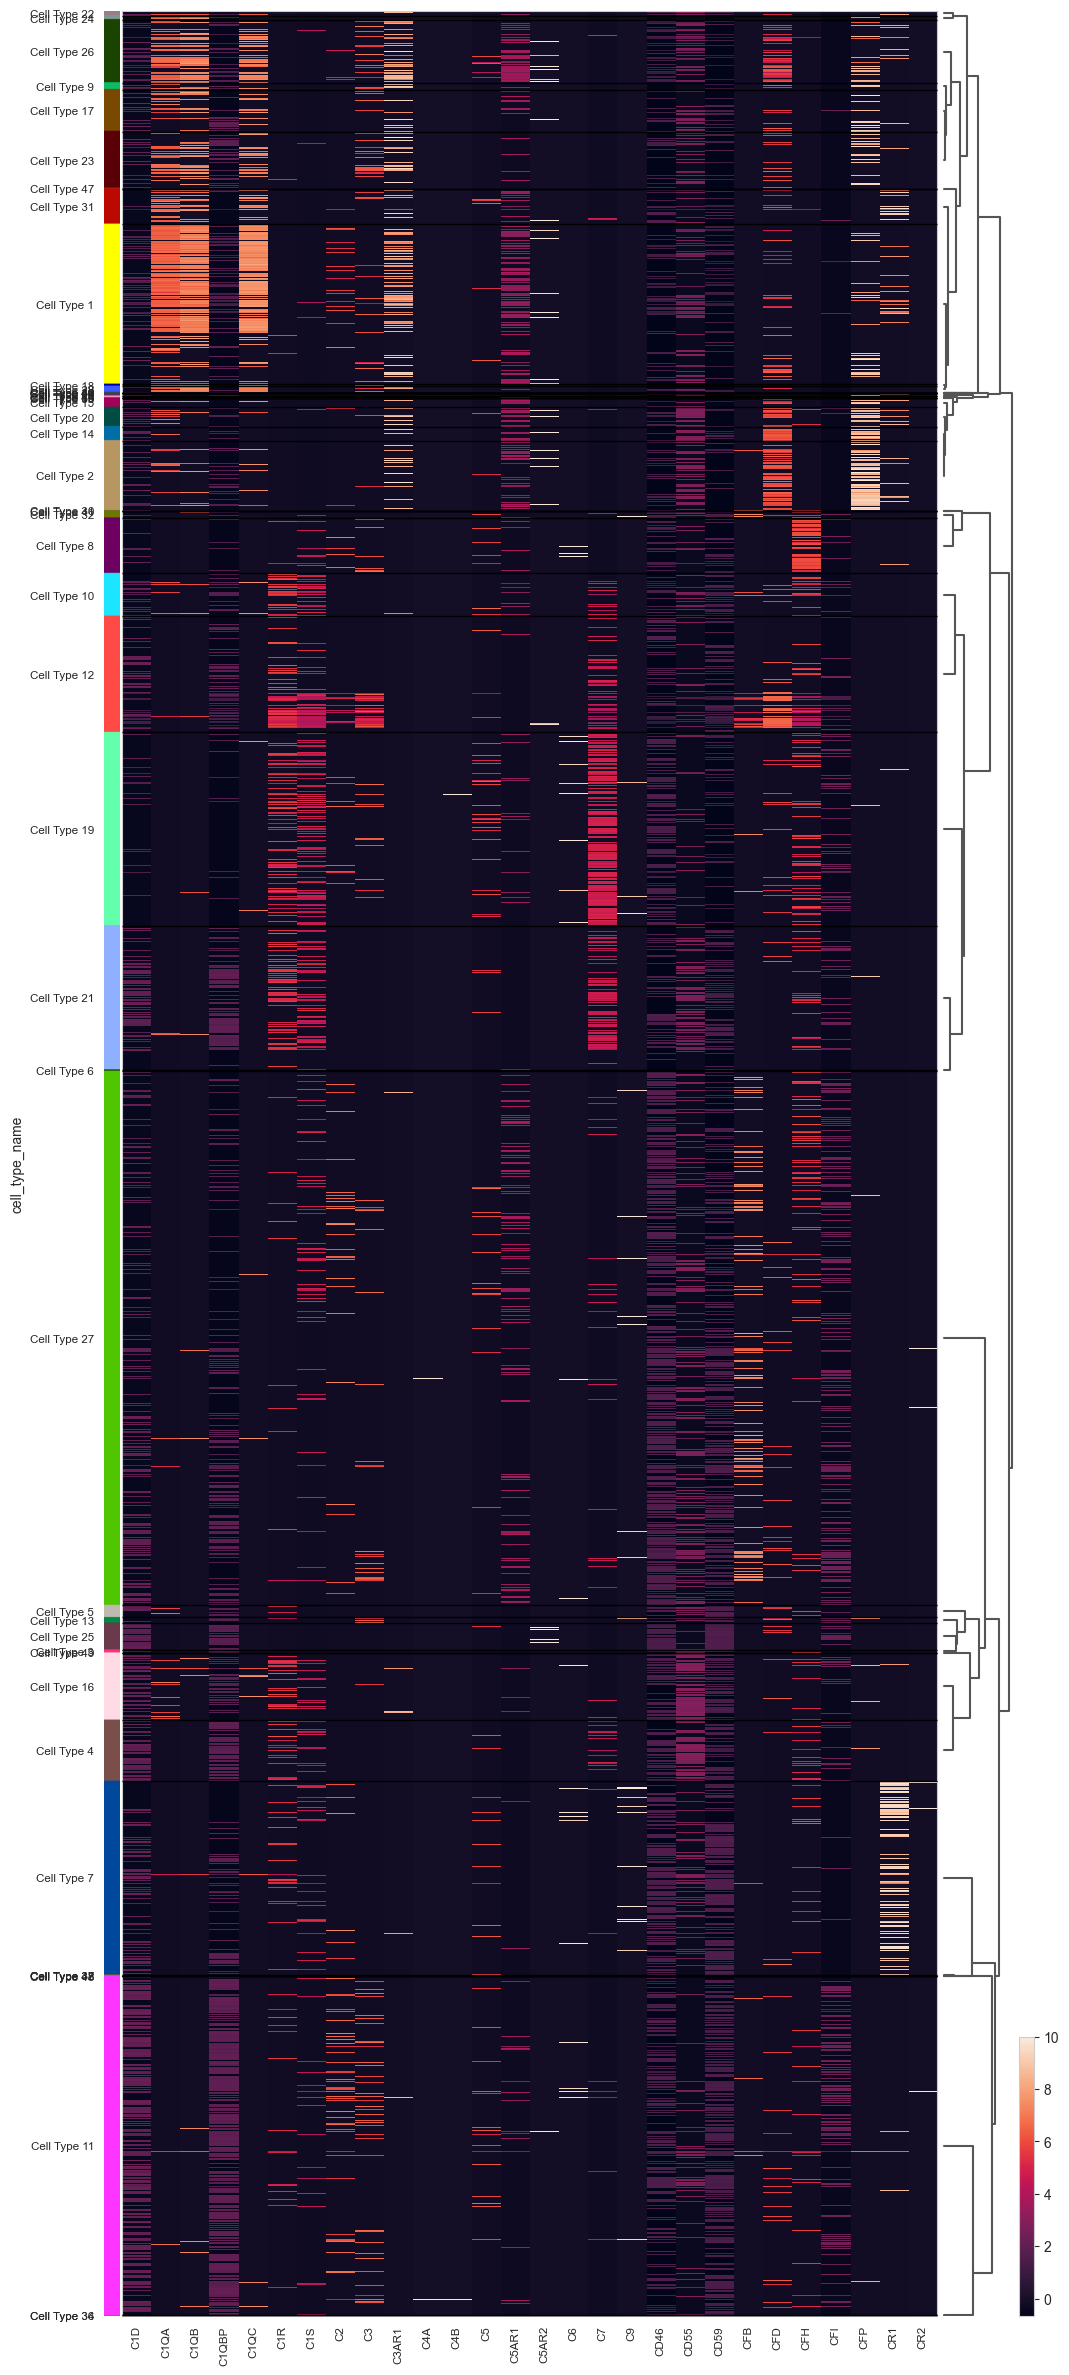

In [109]:
import numpy as np
import scipy.sparse
import pandas as pd

# Show what metadata columns are available
print("Available columns:", list(adata.obs.columns))

# Calculate mean expression of complement genes by cell type
means_by_cell_type = {}
for cell_type in adata.obs['cell_type'].unique():
    cells = adata[adata.obs['cell_type'] == cell_type]
    if len(cells) > 0:
        genes_expr = []
        for gene in genes_in_data_all:
            if gene in cells.var_names:
                expr = cells[:, gene].X
                if scipy.sparse.issparse(expr):
                    expr = expr.toarray()
                genes_expr.append(np.mean(expr))
        means_by_cell_type[cell_type] = np.sum(genes_expr)

# Sort cell types by total expression
sorted_cell_types = sorted(means_by_cell_type.items(), key=lambda x: x[1], reverse=True)

# Get top 50 cell types
top_50_cell_types = [cell_type for cell_type, _ in sorted_cell_types[:50]]

# Filter AnnData to keep only top 50 cell types
adata_top50 = adata[adata.obs['cell_type'].isin(top_50_cell_types)].copy()

# Check if there is a cell_type_ontology_term column or similar that provides names
look_for_columns = ['cell_type_ontology_term', 'cell_ontology_class', 'cell_type_name', 'cell_type_label']
name_column = None
for col in look_for_columns:
    if col in adata.obs.columns:
        name_column = col
        break

if name_column:
    # Use the found column for meaningful cell type names
    cell_type_map = dict(zip(adata.obs['cell_type'], adata.obs[name_column]))
    adata_top50.obs['cell_type_name'] = adata_top50.obs['cell_type'].map(cell_type_map)
    groupby_col = 'cell_type_name'
else:
    # Create a readable category from numeric IDs
    cell_types = adata_top50.obs['cell_type'].unique()
    # Convert to categorical with human-readable labels
    labels = {ct: f"Cell Type {i}" for i, ct in enumerate(cell_types, 1)}
    adata_top50.obs['cell_type_name'] = adata_top50.obs['cell_type'].map(labels).astype('category')
    groupby_col = 'cell_type_name'

# Compute the dendrogram for the filtered dataset
sc.tl.dendrogram(adata_top50, groupby=groupby_col)

# Create heatmap with the filtered data
sc.pl.heatmap(
    adata_top50,
    var_names=genes_in_data_all,
    groupby=groupby_col,
    dendrogram=True,
    standard_scale=None,
    log=False,
    figsize=(12, 30),
    use_raw=False,
    vmax=10,
    swap_axes=False,
    save='human-census_all-genes_top50-cell-types_hm.pdf'
)

In [124]:
# First, make sure your kidney data is properly loaded
kidney = sc.read_h5ad("/Volumes/CHAMPANERI/Databases/Human_Census_KidneyData.h5ad")

# Check if data is loaded correctly
print(f"Data shape: {kidney.shape}")

# Filter genes and do basic preprocessing if needed
sc.pp.filter_genes(kidney, min_counts=1)
sc.pp.normalize_total(kidney, target_sum=1e6)
sc.pp.log1p(kidney)

# Calculate mean expression of your genes of interest for each cell type
import pandas as pd
import scipy.sparse
import numpy as np

# Get the list of genes that are present in the dataset
genes_in_data = [gene for gene in all_genes.keys() if gene in kidney.var_names]

# Create a DataFrame with cells as rows
cell_type_df = pd.DataFrame(index=kidney.obs_names)
cell_type_df['cell_type'] = kidney.obs['cell_type']

# Add expression data for each gene, ensuring numeric types
for gene in genes_in_data:
    gene_expr = kidney[:, gene].X
    if scipy.sparse.issparse(gene_expr):
        gene_expr = gene_expr.toarray().flatten()
    else:
        gene_expr = np.array(gene_expr).flatten()

    # Ensure the data is numeric
    cell_type_df[gene] = pd.to_numeric(gene_expr, errors='coerce')

# Group by cell type and calculate mean expression for each gene
# Address the FutureWarning by explicitly setting observed parameter
mean_by_cell_type = cell_type_df.groupby('cell_type', observed=True)[genes_in_data].mean()

# Calculate overall mean across all genes for each cell type
mean_by_cell_type['overall_mean'] = mean_by_cell_type.mean(axis=1)

# Sort by overall mean expression and get top 50
top_50_cell_types = mean_by_cell_type.sort_values('overall_mean', ascending=False).head(50).index.tolist()

# Filter the AnnData object to only include cells from the top 50 cell types
adata_top50 = kidney[kidney.obs['cell_type'].isin(top_50_cell_types)].copy()

# Verify the filtered data
print(f"Top 50 cell types data shape: {adata_top50.shape}")
print(f"Number of unique cell types: {adata_top50.obs['cell_type'].nunique()}")

# Plot heatmap of these top cell types
sc.pl.heatmap(
    adata_top50,
    var_names=genes_in_data,
    groupby='cell_type',
    dendrogram=True,
    standard_scale=None,
    log=False,
    figsize=(30, 12),
    use_raw=False,
    vmax=10,
    swap_axes=True,
    save='human-census_all-genes_top50-cell-types_hm.pdf'
)

Data shape: (597379, 28)
Top 50 cell types data shape: (201392, 28)
Number of unique cell types: 50


TypeError: agg function failed [how->mean,dtype->object]